# Credit Classification Project

This project is divided into four parts.

1. Data Prep & EDA
2. Logistic Regression
3. Imbalanced Data
4. Ensemble Models



## Step 1: Data Prep & EDA

1. Import the data - performing any datatype conversion as necessary
2. Modifying the target variable - Group 'Standard' and 'Good' Credit together to create a binary classification problem
3. Explore the Data - Try to answer the following questions: which features appear to impact credit score group the most? Are any features highly correlated with each other? Remove any unnecessary features.
4. Prepare the data for modelling. Create dummy variables, split the data into train and test, and scale the features if necessary.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# read data and drop irrelavent columns for modelling

credit_df = pd.read_csv("../Data/credit_train_clean.csv").drop(["Name", "SSN", "ID", "Customer_ID"], axis=1)

credit_df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
# exploring data and each feature

credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

<Axes: xlabel='Credit_Score', ylabel='Age'>

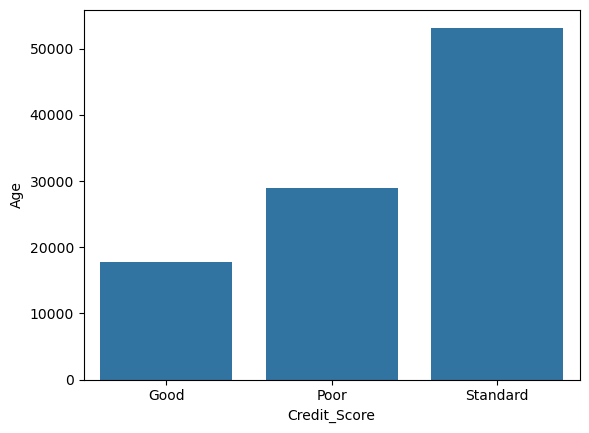

In [5]:
# exploring correlation between target variable and age column
sns.barplot(data=credit_df.groupby("Credit_Score")["Age"].count().reset_index(), x="Credit_Score", y="Age")

In [5]:
# merging good and standard classes together to change our model to a binary classfication

credit_df["Credit_Score"] = credit_df["Credit_Score"].map({
                                                "Good": "Good or Standard", 
                                                "Standard":  "Good or Standard",
                                                "Poor": "Poor"})

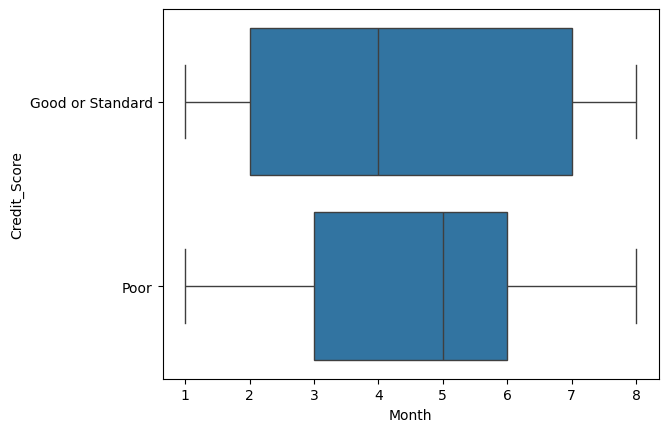

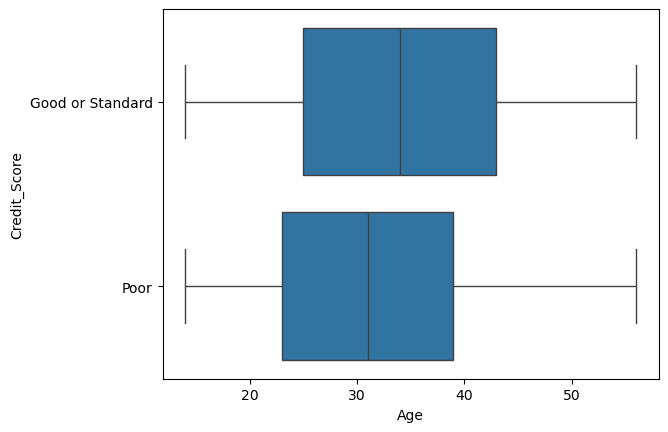

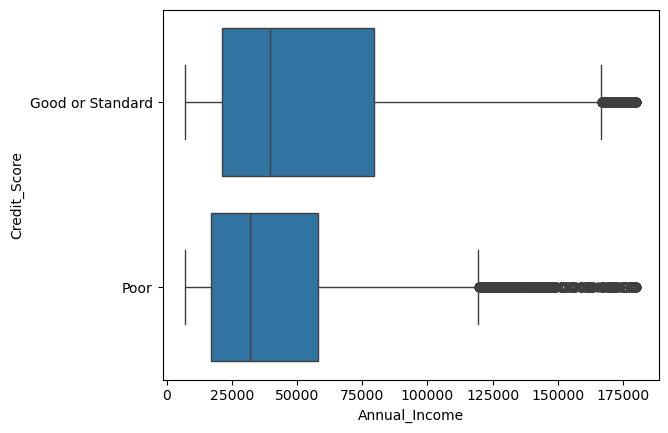

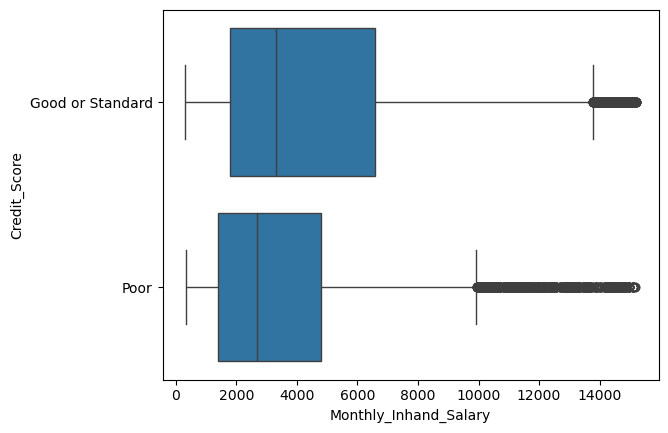

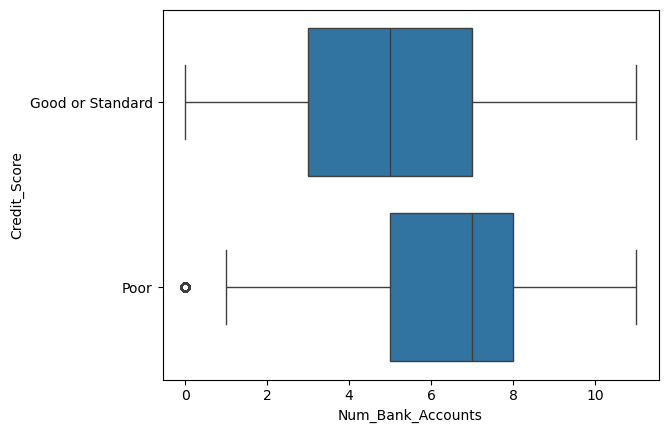

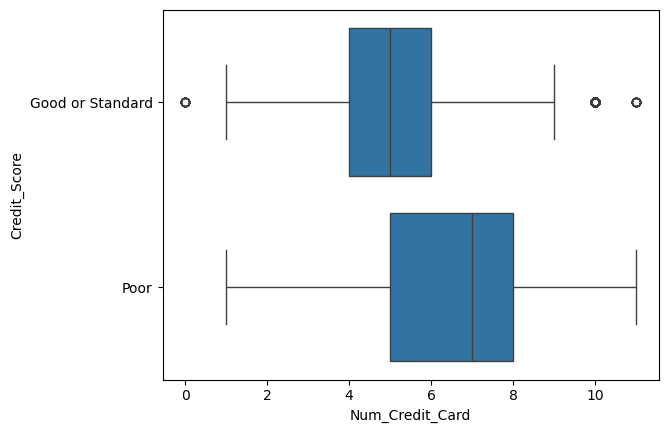

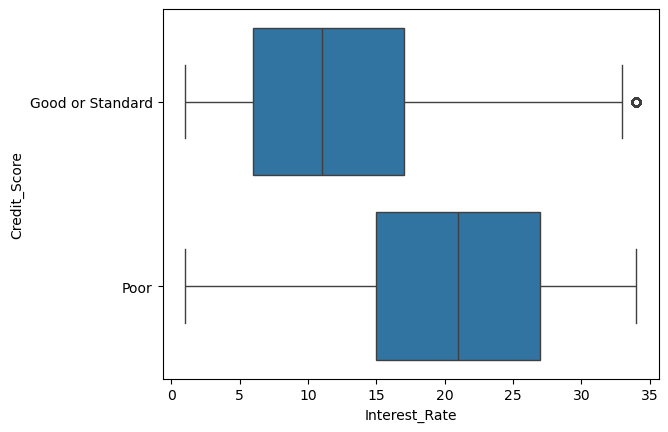

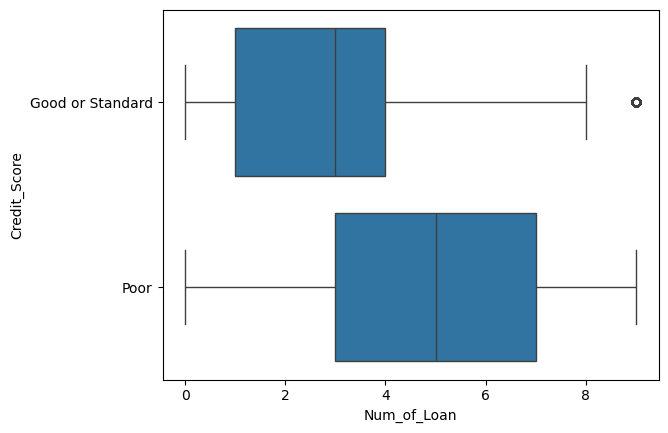

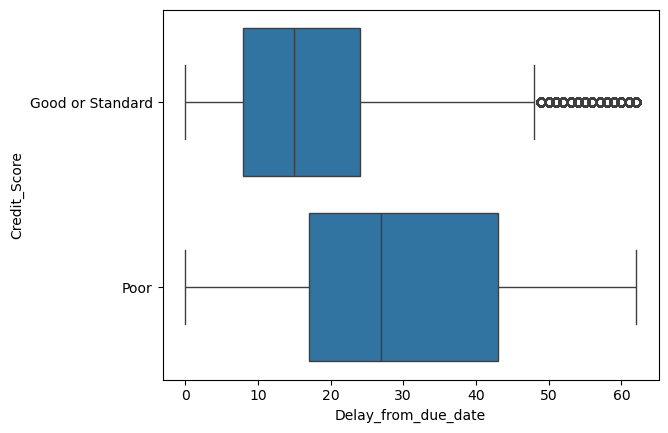

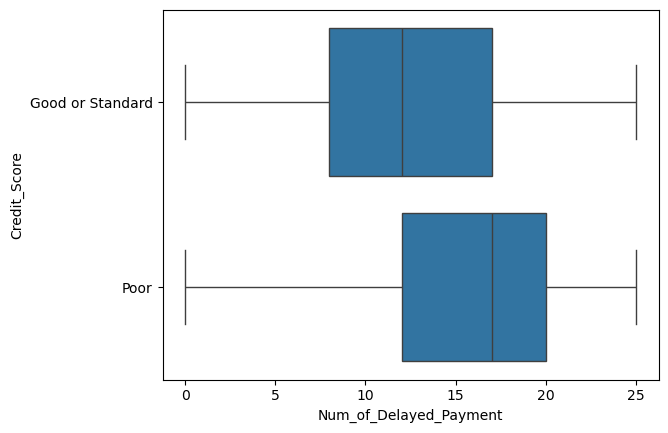

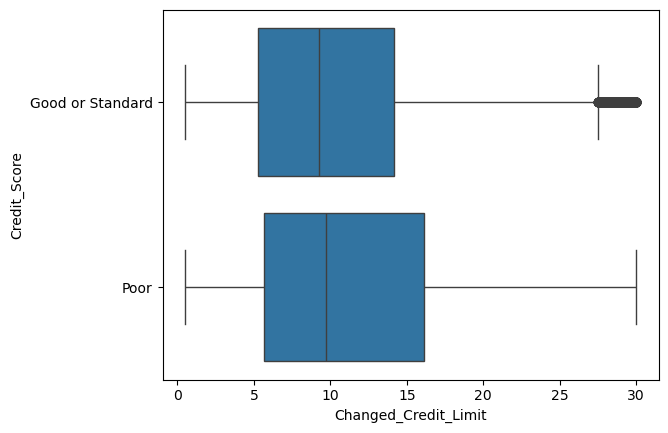

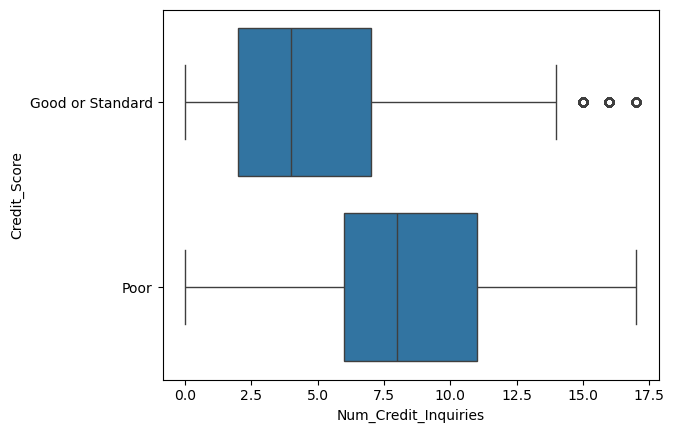

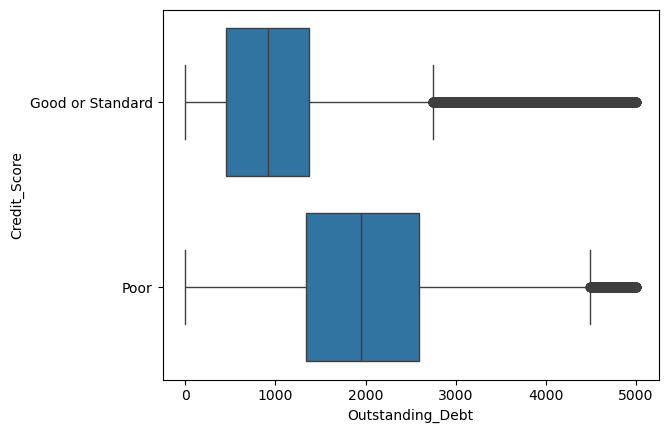

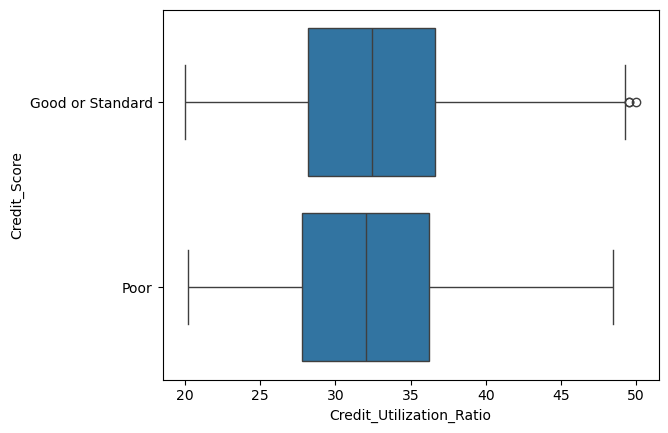

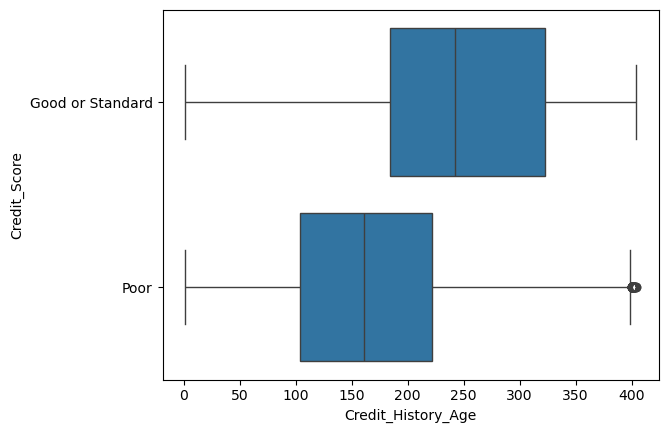

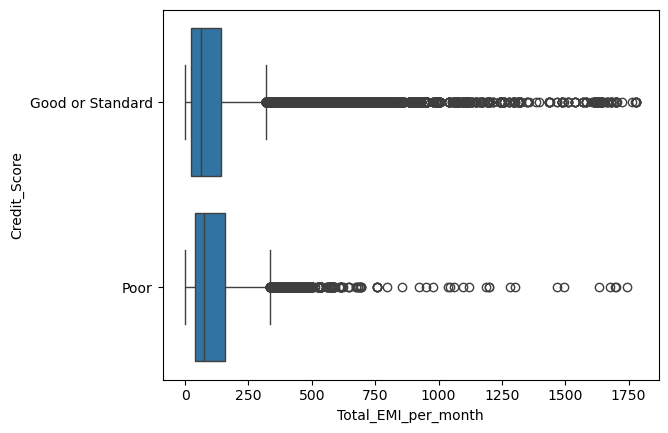

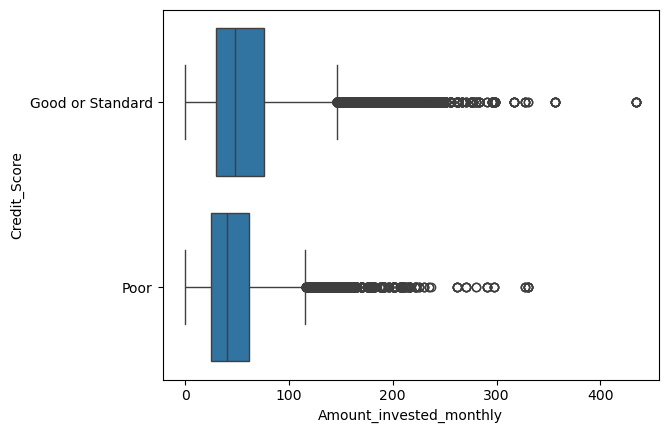

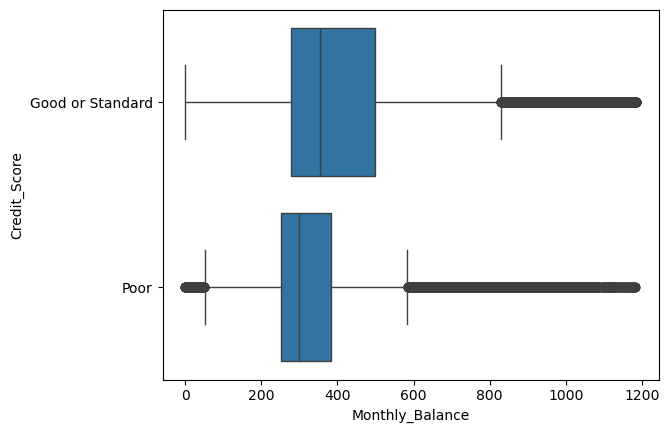

In [8]:
# exploring numerical features with respect to target variable(Credit_Score)

def num_plotter(data, target):
    for col in data.select_dtypes(["int", "float"]):
        sns.boxplot(data=data, x=col, y=target, #stat="percent", kde=True, bins=20
                   )
        plt.show()
        
num_plotter(credit_df, "Credit_Score")

In [6]:
# map the target values to numerical values 

credit_df["target"] = credit_df["Credit_Score"].map({
                                                "Good or Standard": 0, 
                                                "Poor": 1
                                            })

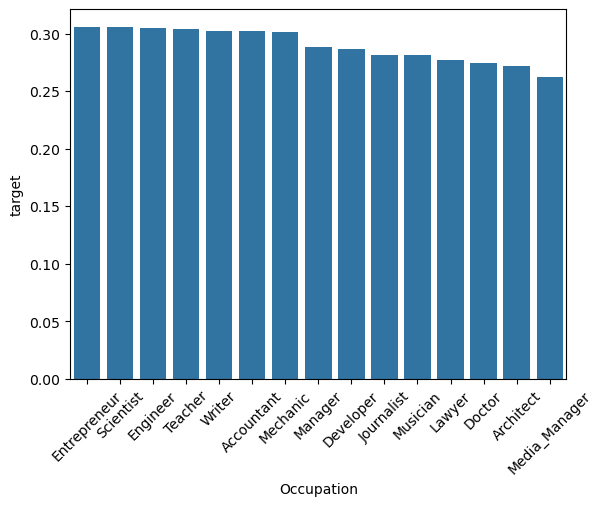

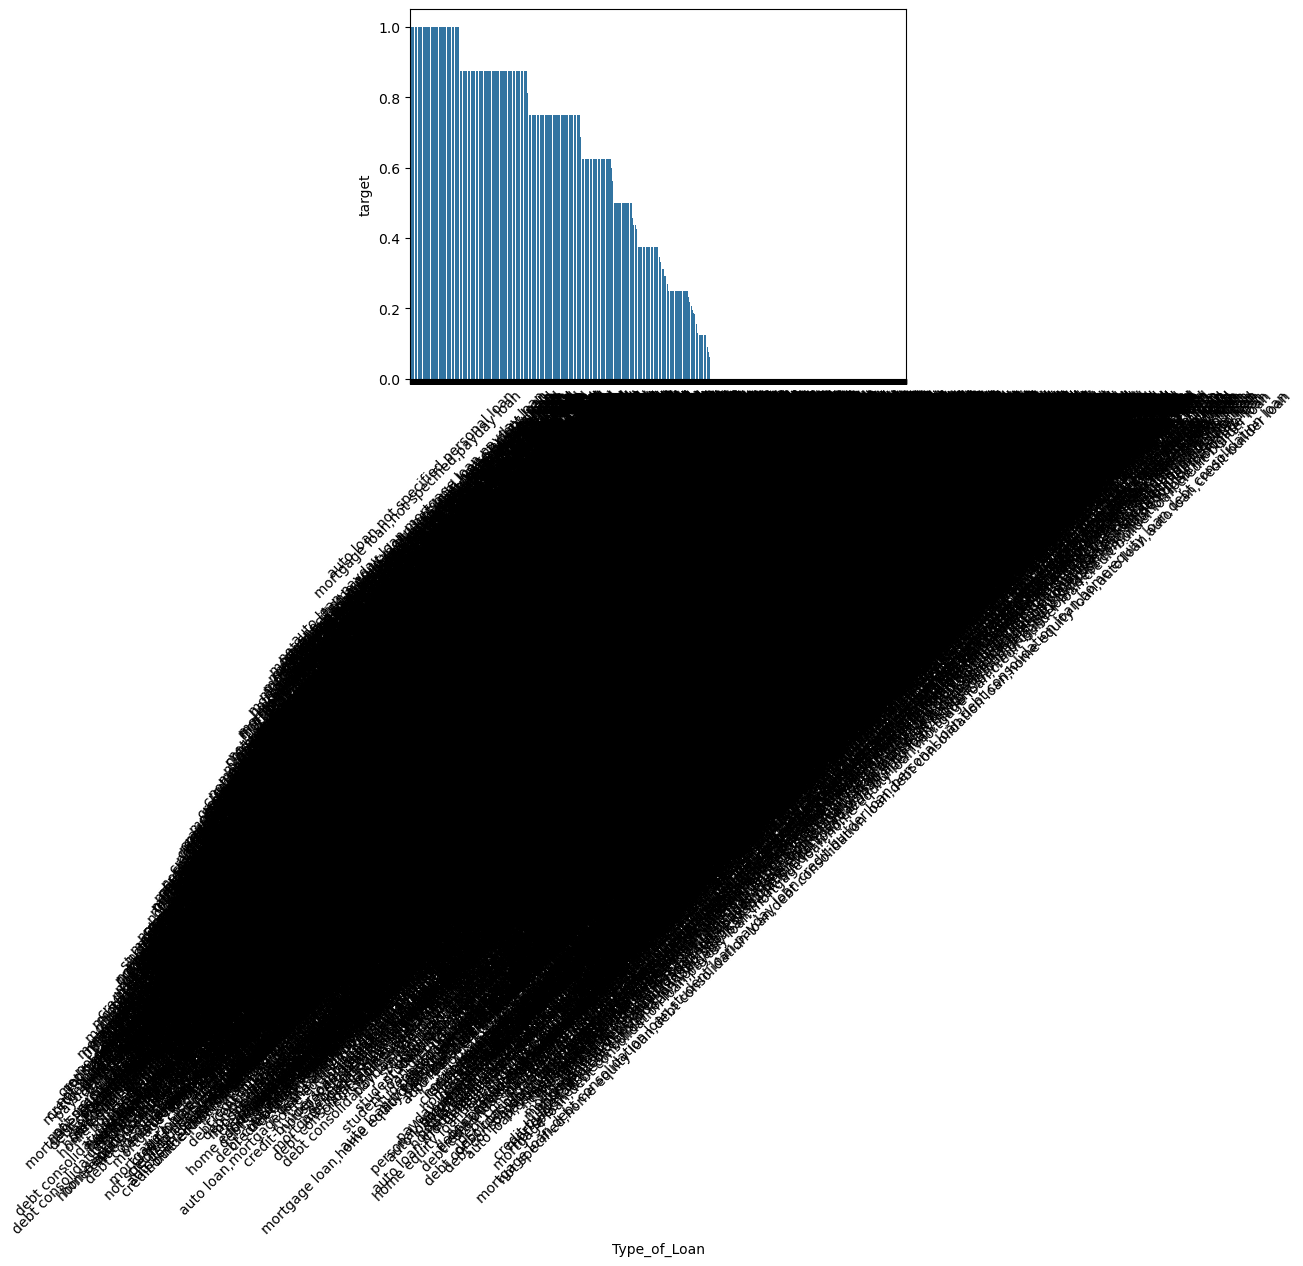

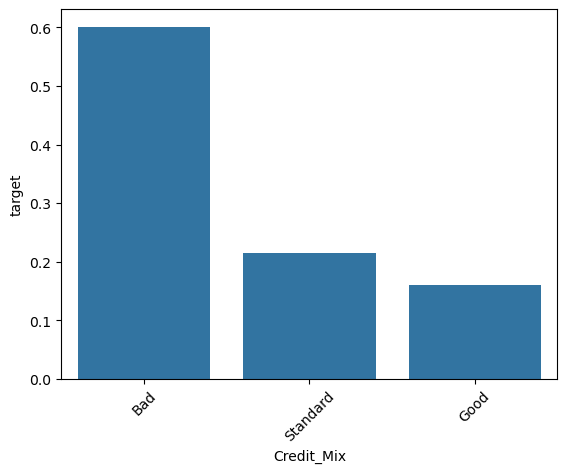

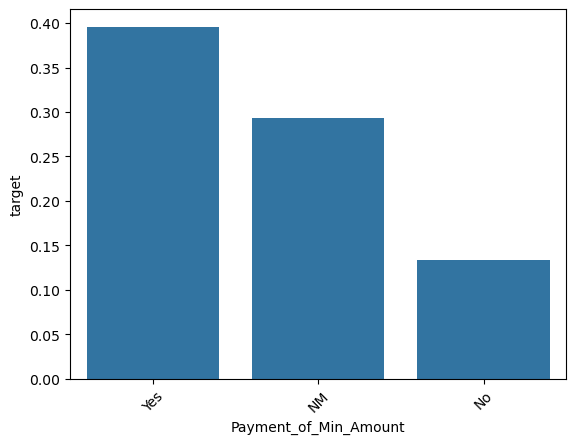

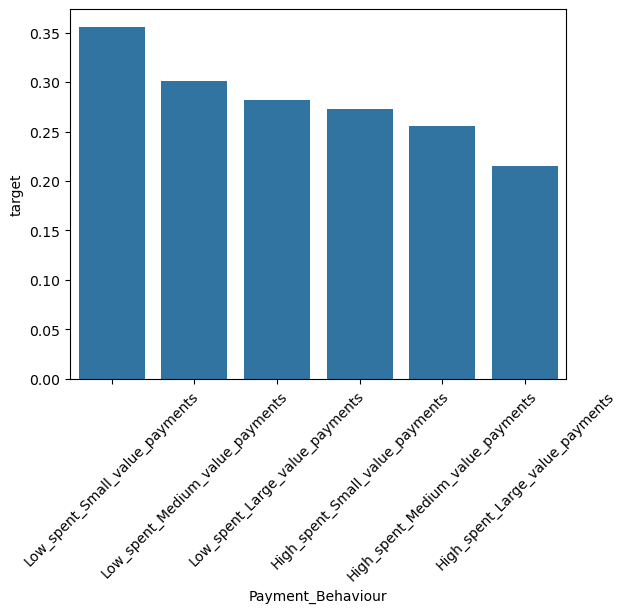

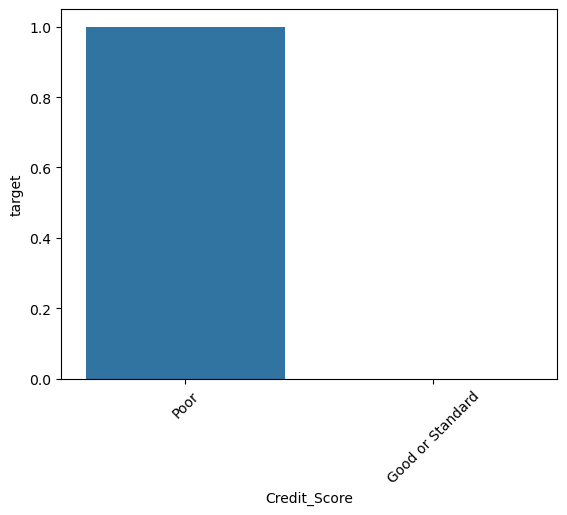

In [10]:
# exploring categorical features: object dtype

def cat_plotter(data, target):
    for col in data.select_dtypes(["object"]).columns:
        sns.barplot(
            data=(
                data
                .groupby(col, as_index=False)
                .agg({"target": "mean"})
                .sort_values(by="target", ascending=False)
                 ), 
            x=col, 
            y=target)
        plt.xticks(rotation=45)
        plt.show()
        
cat_plotter(credit_df, "target")

In [139]:
# Credit Card X Credit Inquiries or Outstanding Debt/Payment Behaviour
# create a list of available features and create dummy variables

features = [
    "Age",
    "Month",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Credit_Utilization_Ratio",
    "Amount_invested_monthly",
    "Interest_Rate",
    "Num_Bank_Accounts",
    "Changed_Credit_Limit",
    "Num_Credit_Card",
    "Credit_History_Age", 
    "Payment_of_Min_Amount", 
    "Monthly_Balance", 
#     "Payment_Behaviour",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Mix",
    "Total_EMI_per_month",
#     "Type_of_Loan", 
]

X = pd.get_dummies(credit_df[features], dtype="int", drop_first=True
                  )
y = credit_df["target"]

# split the data to train, test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [8]:
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

## Step 2: Logistic Regression

1. Fit a Logistic Regression Model that uses default hyperparameters.
2. Tune the hyperparameters of the logistic regression model
3. Report accuracy, precision, recall & F1 score after tuning the threshold to maximize F1 Score
4. Plot the ROC curve and report AUC for your tuned model

In [13]:
# fit a logistic regression model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)

lr = logreg.fit(X_train, y_train)

# evaluate the accuracy

print(f"Train Accuracy: {lr.score(X_train, y_train)}")
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

Train Accuracy: 0.7823
Test Accuracy: 0.7816


In [15]:
# tune hyperparameters and find out the best parameters using GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters = {
    "C": np.linspace(.1, 1.1, 11),
    "penalty": ["l1", "l2"],
}

gridsearch = GridSearchCV(LogisticRegression(solver="saga", max_iter=1000), parameters)

gridsearch.fit(X_train_std, y_train)

gridsearch.best_params_

{'C': 0.30000000000000004, 'penalty': 'l2'}

In [9]:
# fit the model with the best parameters from GridSearchCV
logreg = LogisticRegression(max_iter=5000, **gridsearch.best_params_)

lr_tuned = logreg.fit(X_train_std, y_train)

# print the accuracy 

print(f"Train Accuracy: {lr_tuned.score(X_train_std, y_train)}")
print(f"Test Accuracy: {lr_tuned.score(X_test_std, y_test)}")

Train Accuracy: 0.789175
Test Accuracy: 0.78765


<Axes: >

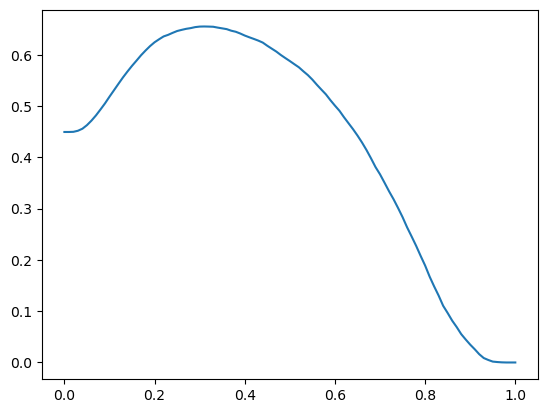

In [10]:
# calculate f1_score based on different thresholds 
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr_tuned.predict_proba(X_train_std)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1)

In [11]:
# find the max of f1
thresh = thresholds[f1.index(max(f1))]

thresh

0.31

In [14]:
# calculate metrics based on the threshold 

preds = lr_tuned.predict_proba(X_test_std)[:, 1] > thresh

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

Accuracy: 0.786
Precision: 0.6164113453662976
Recall: 0.6988822012037833
F1: 0.6550612508059317


In [15]:
# print confusion matrix 

confusion_matrix(y_test, preds)

array([[11656,  2529],
       [ 1751,  4064]])

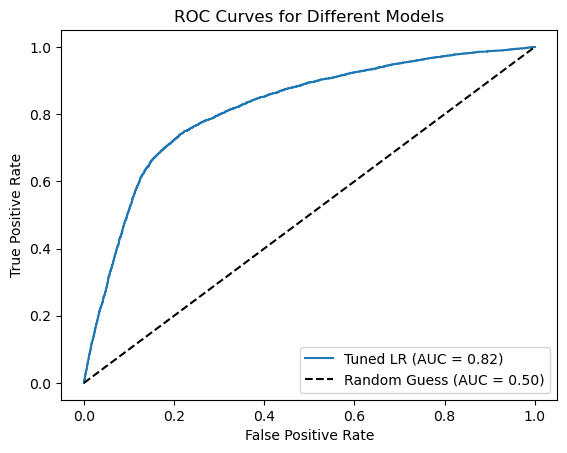

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
    
# Generate ROC AUC for tuned model
y_probs = lr_tuned.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)


# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Tuned LR (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

## Step 3. Imbalanced Data Techniques

1. Try using SMOTE, by resampling up to an equal number of 0s and 1s, then tune the model threshold. 
2. Did this improve the model performance in terms of accuracy, F1, and AUC?

###

In [41]:

import imblearn.over_sampling as OS


smt = OS.SMOTE(
    sampling_strategy="auto",
    random_state=2023
)

X_train_smt, y_train_smt = smt.fit_resample(X_train_std, y_train)

In [43]:
# fit the logistic Regression on the new resampled data 

logreg = LogisticRegression(max_iter=5000, **gridsearch.best_params_)

lr_smt = logreg.fit(X_train_smt, y_train_smt)

print(f"Train Accuracy: {lr_smt.score(X_train_smt, y_train_smt)}")
print(f"Test Accuracy: {lr_smt.score(X_test_std, y_test)}")

Train Accuracy: 0.762192653607195
Test Accuracy: 0.78145


<Axes: >

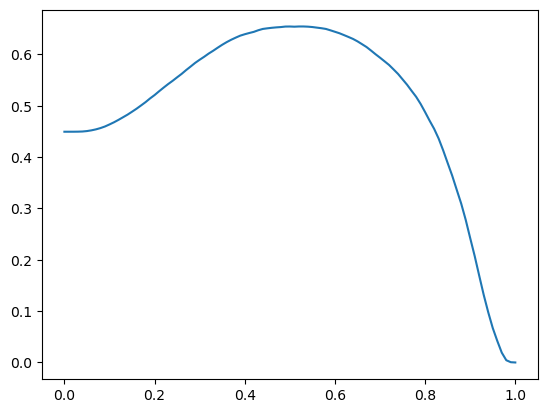

In [52]:
# Compute the F1 score for the new model.

from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr_smt.predict_proba(X_train_std)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1)

In [53]:
# calculate the max f1

thresh = thresholds[f1.index(max(f1))]

thresh

0.53

In [54]:
# calculate metrics for the model using the threshold for max f1

preds = lr_smt.predict_proba(X_test_std)[:, 1] > thresh

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

Accuracy: 0.7875
Precision: 0.6197765192101637
Recall: 0.6963026655202064
F1: 0.655814706835115


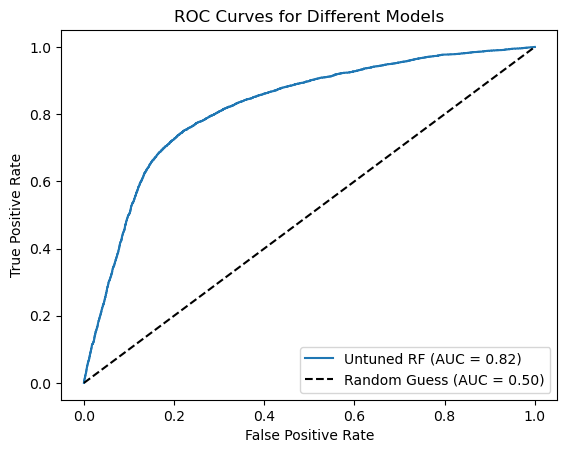

In [57]:
# Generate ROC AUC for smote model
y_probs = lr_smt.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Untuned RF (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

## Ensemble Models

1. Fit & Tune Random Forest and GBM Models
2. Plot the ROC curves for both models
3. Select the model with the best AUC, then tune the threshold to maximize f1, and report final metrics
4. Build a Beeswarm plot of shap values for the final model.

In [153]:
# Credit Card X Credit Inquiries or Outstanding Debt/Payment Behaviour

features = [
    "Age",
    "Month",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Credit_Utilization_Ratio",
    "Amount_invested_monthly",
    "Interest_Rate",
    "Num_Bank_Accounts",
    "Changed_Credit_Limit",
    "Num_Credit_Card",
    "Credit_History_Age", 
    "Payment_of_Min_Amount", 
    "Monthly_Balance", 
#     "Payment_Behaviour",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Mix",
    "Total_EMI_per_month",
#     "Type_of_Loan", 
]

# define features and target variables 
# create dummy variables from the integer type columns in the dataset 
X = pd.get_dummies(credit_df[features], dtype="int", #drop_first=True
                  )
y = credit_df["target"]

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [20]:
# Fit RandomForest Classifier and GradientBoosting Classifier models and calculate accuracies
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

rf.fit(X_train, y_train)

print(f"RF Train Accuracy: {rf.score(X_train, y_train)}")
print(f"RF Test Accuracy: {rf.score(X_test, y_test)}")

gbm = GradientBoostingClassifier(random_state=2023)

gbm.fit(X_train, y_train)

print(f"GBM Train Accuracy: {gbm.score(X_train, y_train)}")
print(f"GBM Test Accuracy: {gbm.score(X_test, y_test)}")

RF Train Accuracy: 0.9999875
RF Test Accuracy: 0.898
GBM Train Accuracy: 0.8322375
GBM Test Accuracy: 0.8318


In [21]:
# Tune hyperparameters using andomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
      
rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=50, stop=1050, step=100),
    'max_features': ["sqrt"],
    'bootstrap': [True],
    'max_samples': [.3, .5, .9],
    'max_depth': np.arange(start=3, stop=11, step=2),
    'min_samples_leaf': [2, 5, 10, 20, 100],
}

grid = RandomizedSearchCV(
    rf, 
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

{'n_estimators': 850,
 'min_samples_leaf': 2,
 'max_samples': 0.9,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': True}

In [25]:
# Fine-tune hyperparameters using GridSearchCV based on the result of previous tuning to find more optimum hyperparameters

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=825, stop=901, step=25),
    'bootstrap': [True],
    'max_features': [None],
    'max_samples': [.9],
    'max_depth': [9],
    'min_samples_leaf': [2, 3]    
}

grid = RandomizedSearchCV(
    rf, 
    params,
    n_iter=100,
    scoring="accuracy",
    verbose=2
)

grid.fit(X_train, y_train)

grid.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/chrisb/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END bootstrap=True, max_depth=9, max_features=None, max_samples=0.9, min_samples_leaf=2, n_estimators=825; total time=  48.3s
[CV] END bootstrap=True, max_depth=9, max_features=None, max_samples=0.9, min_samples_leaf=2, n_estimators=825; total time=  48.3s
[CV] END bootstrap=True, max_depth=9, max_features=None, max_samples=0.9, min_samples_leaf=2, n_estimators=825; total time=  48.3s
[CV] END bootstrap=True, max_depth=9, max_features=None, max_samples=0.9, min_samples_leaf=2, n_estimators=825; total time=  48.4s
[CV] END bootstrap=True, max_depth=9, max_features=None, max_samples=0.9, min_samples_leaf=2, n_estimators=825; total time=  48.2s
[CV] END bootstrap=True, max_depth=9, max_features=None, max_samples=0.9, min_samples_leaf=2, n_estimators=850; total time=  49.6s
[CV] END bootstrap=True, max_depth=9, max_features=None, max_samples=0.9, min_samples_leaf=2, n_estimators=850; total time=  49.8s
[CV] END bootstrap=True, max_depth=9, max_features=None, max_samples=0.9, min_sampl

{'n_estimators': 850,
 'min_samples_leaf': 2,
 'max_samples': 0.9,
 'max_features': None,
 'max_depth': 9,
 'bootstrap': True}

In [27]:
# Fit the model again with the best hyperparameters

rf_tuned = RandomForestClassifier(random_state=2023, n_jobs=-1, **grid.best_params_)

rf_tuned.fit(X_train, y_train)

print(f"RF Train Accuracy: {rf_tuned.score(X_train, y_train)}")
print(f"RF Test Accuracy: {rf_tuned.score(X_test, y_test)}")

RF Train Accuracy: 0.8491875
RF Test Accuracy: 0.84265


In [28]:
# Construct the confusion matrix 

confusion_matrix(y_test, rf_tuned.predict(X_test))

array([[13034,  1151],
       [ 1996,  3819]])

In [30]:
# Tune hyperparameters for Gradient Boosting model 

import numpy as np

from sklearn.model_selection import RandomizedSearchCV
      
gb = GradientBoostingClassifier(random_state=2023)

params = {
    'n_estimators': [20, 40, 60, 80, 100, 200],
    'learning_rate': [.01, .1],
    'max_features': ["sqrt"],
    'subsample': [.8, .9, .95],
    'max_depth': np.arange(start=3, stop=12, step=2),
    'min_samples_leaf': [2, 5, 10]    
}

grid = RandomizedSearchCV(
    gb, 
    params,
    n_iter=50,
    scoring="accuracy",
    verbose=3
)

grid.fit(X_train, y_train)

grid.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END learning_rate=0.1, max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=100, subsample=0.9;, score=0.877 total time=  13.0s
[CV 2/5] END learning_rate=0.1, max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=100, subsample=0.9;, score=0.876 total time=  12.5s
[CV 3/5] END learning_rate=0.1, max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=100, subsample=0.9;, score=0.879 total time=  12.7s
[CV 4/5] END learning_rate=0.1, max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=100, subsample=0.9;, score=0.877 total time=  12.6s
[CV 5/5] END learning_rate=0.1, max_depth=11, max_features=sqrt, min_samples_leaf=2, n_estimators=100, subsample=0.9;, score=0.874 total time=  12.5s
[CV 1/5] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=10, n_estimators=40, subsample=0.9;, score=0.710 total time=   2.1s
[CV 2/5] END learning_rate=0.01, max_d

[CV 1/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=20, subsample=0.95;, score=0.710 total time=   0.7s
[CV 2/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=20, subsample=0.95;, score=0.710 total time=   0.7s
[CV 3/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=20, subsample=0.95;, score=0.710 total time=   0.7s
[CV 4/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=20, subsample=0.95;, score=0.710 total time=   0.7s
[CV 5/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=20, subsample=0.95;, score=0.710 total time=   0.7s
[CV 1/5] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=20, subsample=0.8;, score=0.825 total time=   1.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=

[CV 1/5] END learning_rate=0.1, max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=60, subsample=0.95;, score=0.855 total time=   6.3s
[CV 2/5] END learning_rate=0.1, max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=60, subsample=0.95;, score=0.859 total time=   6.2s
[CV 3/5] END learning_rate=0.1, max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=60, subsample=0.95;, score=0.861 total time=   6.1s
[CV 4/5] END learning_rate=0.1, max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=60, subsample=0.95;, score=0.856 total time=   6.1s
[CV 5/5] END learning_rate=0.1, max_depth=9, max_features=sqrt, min_samples_leaf=5, n_estimators=60, subsample=0.95;, score=0.856 total time=   6.1s
[CV 1/5] END learning_rate=0.01, max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=60, subsample=0.95;, score=0.792 total time=   7.7s
[CV 2/5] END learning_rate=0.01, max_depth=11, max_features=sqrt, min_samples_leaf=5, n_estimators=60, s

[CV 1/5] END learning_rate=0.01, max_depth=9, max_features=sqrt, min_samples_leaf=10, n_estimators=80, subsample=0.9;, score=0.824 total time=   7.7s
[CV 2/5] END learning_rate=0.01, max_depth=9, max_features=sqrt, min_samples_leaf=10, n_estimators=80, subsample=0.9;, score=0.824 total time=   7.8s
[CV 3/5] END learning_rate=0.01, max_depth=9, max_features=sqrt, min_samples_leaf=10, n_estimators=80, subsample=0.9;, score=0.826 total time=   7.6s
[CV 4/5] END learning_rate=0.01, max_depth=9, max_features=sqrt, min_samples_leaf=10, n_estimators=80, subsample=0.9;, score=0.824 total time=   8.1s
[CV 5/5] END learning_rate=0.01, max_depth=9, max_features=sqrt, min_samples_leaf=10, n_estimators=80, subsample=0.9;, score=0.822 total time=   7.9s
[CV 1/5] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=200, subsample=0.95;, score=0.831 total time=   7.2s
[CV 2/5] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=200

[CV 1/5] END learning_rate=0.1, max_depth=9, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.8;, score=0.874 total time=  17.5s
[CV 2/5] END learning_rate=0.1, max_depth=9, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.8;, score=0.877 total time=  17.5s
[CV 3/5] END learning_rate=0.1, max_depth=9, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.8;, score=0.876 total time=  17.6s
[CV 4/5] END learning_rate=0.1, max_depth=9, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.8;, score=0.873 total time=  17.6s
[CV 5/5] END learning_rate=0.1, max_depth=9, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.8;, score=0.872 total time=  17.6s
[CV 1/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=40, subsample=0.8;, score=0.710 total time=   1.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=40,

{'subsample': 0.9,
 'n_estimators': 100,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 11,
 'learning_rate': 0.1}

In [44]:
# Fine-tuning using GridSearchCV based on the result of RandomSearchCV
# Calculate the best hyperparameters

import numpy as np

from sklearn.model_selection import GridSearchCV
      
gb = GradientBoostingClassifier(random_state=2023)

params = {
    'n_estimators': [
        180, 200, 220
    ],
    'learning_rate': [.1],
    'max_features': ["sqrt"],
    'subsample': [.9],
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [5, 20, 30, 40]    
}

grid = GridSearchCV(
    gb, 
    params,
    scoring="accuracy",
    verbose=3
)

grid.fit(X_train, y_train)

grid.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END learning_rate=0.1, max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=160, subsample=0.8;, score=0.882 total time=  19.9s
[CV 2/5] END learning_rate=0.1, max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=160, subsample=0.8;, score=0.885 total time=  19.9s
[CV 3/5] END learning_rate=0.1, max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=160, subsample=0.8;, score=0.884 total time=  20.0s
[CV 4/5] END learning_rate=0.1, max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=160, subsample=0.8;, score=0.881 total time=  20.0s
[CV 5/5] END learning_rate=0.1, max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=160, subsample=0.8;, score=0.882 total time=  20.3s
[CV 1/5] END learning_rate=0.1, max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=180, subsample=0.8;, score=0.883 total time=  22.5s
[CV 2/5] END learning_rate=0.1, max_dept

{'learning_rate': 0.1,
 'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 200,
 'subsample': 0.8}

In [45]:
# Compute the accuracy

print(f"Training Accuracy: {grid.score(X_train, y_train)}")
print(f"Test Accuracy: {grid.score(X_test, y_test)}")

Training Accuracy: 0.9997125
Test Accuracy: 0.89525


In [136]:
# refit the model using the best hyperparameters 

from sklearn.ensemble import GradientBoostingClassifier

gbm_tuned = GradientBoostingClassifier(
    random_state=2023, 
    'learning_rate': 0.1,
    'max_depth': 13,
    'max_features': 'sqrt',
    'min_samples_leaf': 5,
    'n_estimators': 200,
    'subsample': 0.8
)

gbm_tuned.fit(X_train, y_train)

print(f"Training Accuracy: {gbm_tuned.score(X_train, y_train)}")
print(f"Test Accuracy: {gbm_tuned.score(X_test, y_test)}")

Training Accuracy: 0.9001
Test Accuracy: 0.87315


In [137]:
# Construct Confusion Matrix for new model 
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, gbm_tuned.predict(X_test))

array([[13051,  1134],
       [ 1403,  4412]])

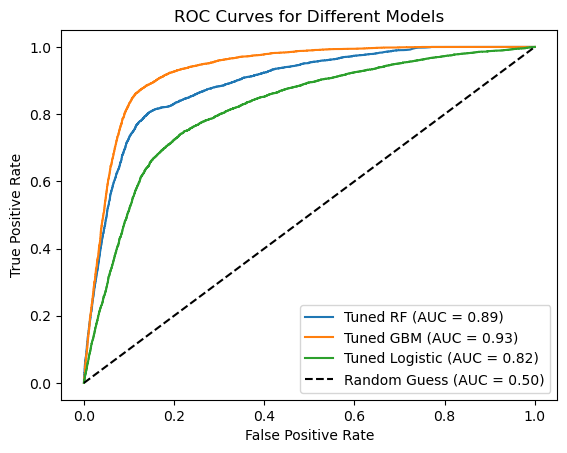

In [146]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
    
# Generate ROC AUC for tuned RF model
y_probs = rf_tuned.predict_proba(X_test_lr)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)
auc_score1 = auc(fpr1, tpr1)

# Generate ROC AUC for tuned GBM model
y_probs = gbm_tuned.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds = roc_curve(y_test, y_probs)
auc_score2 = auc(fpr2, tpr2)


# Generate ROC AUC for tuned Logistic Regression model
y_probs = lr_tuned.predict_proba(X_test_std)[:, 1]
fpr3, tpr3, thresholds = roc_curve(y_test, y_probs)
auc_score3 = auc(fpr3, tpr3)

# Plot the ROC curve
plt.plot(fpr1, tpr1, label=f'Tuned RF (AUC = {auc_score1:.2f})')
plt.plot(fpr2, tpr2, label=f'Tuned GBM (AUC = {auc_score2:.2f})')
plt.plot(fpr3, tpr3, label=f'Tuned Logistic (AUC = {auc_score3:.2f})')


# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

<Axes: >

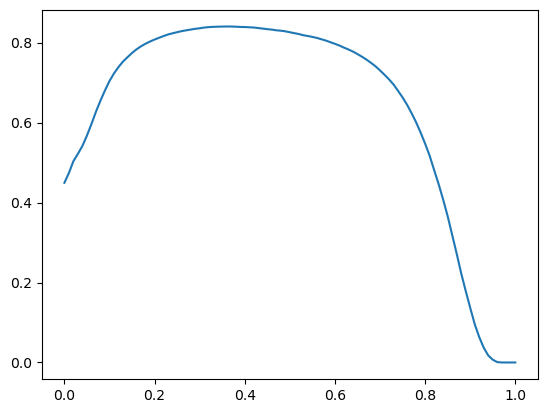

In [155]:
# Compute f1_score with respect to thresholds 

from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(gbm_tuned.predict_proba(X_train)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1)

In [157]:
# Find Max threshold 

thresh = thresholds[f1.index(max(f1))]

thresh

0.36

In [160]:
# Compute metrics based on the max threshold

preds = gbm_tuned.predict_proba(X_test)[:, 1] > thresh

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

Accuracy: 0.87955
Precision: 0.7632962275819418
Recall: 0.8490111779879622
F1: 0.8038752747700073


In [166]:
# Build a Beeswarm plot of shap values for the final model.

import shap

explainer = shap.Explainer(gbm_tuned)

shap_values = explainer(X_test.sample(200, random_state=12345))

<Axes: xlabel='Importance', ylabel='Feature'>

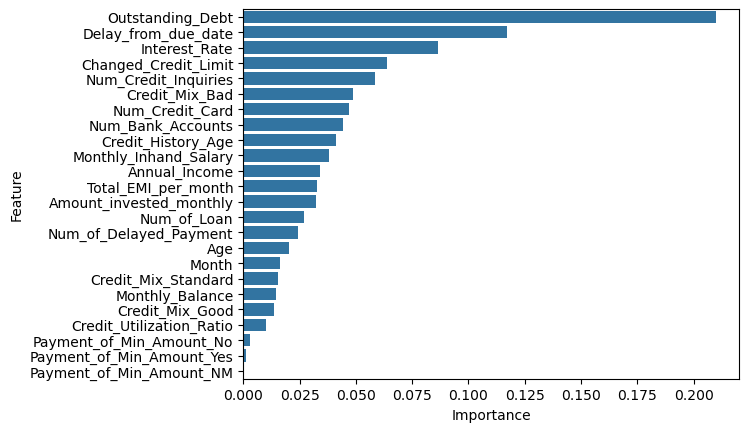

In [156]:
importance_df = (
    pd.DataFrame({"Feature": X_train.columns, "Importance": gbm_tuned.feature_importances_})
    .sort_values("Importance", ascending=False)
)

sns.barplot(importance_df, x="Importance", y="Feature" )

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


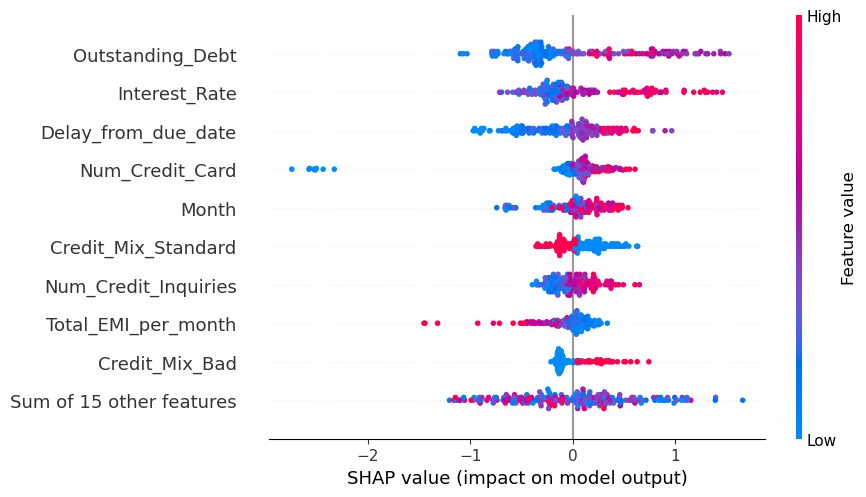

In [168]:
shap.plots.beeswarm(shap_values)